# **LAVA\* | Algorithmic Voyages Through the Afterlife's Maze**
The objective of our project is to systematically evaluate algorithmic performance in pathfinding tasks, and to achieve this, we've structured our study into two distinct parts: the first section is dedicated to **pathfinding in offline search** and the second one to **pathfinding in online search**.

To add a playful dimension to our investigation, we chose to adopt a narrative framework.
Drawing inspiration from Dante's Comedy, we introduced a creative narrative twist to the original plot. In our imagined scenario, Dante momentarily loses Virgil, and to navigate the optimal path through Hell before reuniting with Virgil, he seeks guidance from four maidens, unraveling the intricate maze of the afterlife.

These maidens – embodying our team's genius with a touch of flair – are entrusted with the critical tasks of evaluating algorithms based on their performance in specific contexts and occasionally crafting new algorithms tailored for Dante's journey.

With this imaginative backdrop, we welcome you aboard as we present the results of our exploration. Let the journey begin!

<img src="pictures/picture1.png" width="800" />

# <u>Part 1 — **Pathfinding in Offline Search**<u>

## How do we find the 'ShortBest' path in Offline Search?
In our Artificial Intelligence Fundamentals course, we've explored four essential pathfinding algorithms, each with its distinct strengths and weaknesses:

<u>*Uninformed search strategies*</u>:
-	**Breadth-First Search**
    * *Strength*: BFS systematically explores all possible paths level by level. In challenging environments, where the optimal path might not be immediately apparent, BFS ensures thorough exploration.
    * *Consideration*: However, BFS might become computationally expensive in larger graphs or when the optimal path is located deep within the search space.

-	**Uniform-Cost Search**
    * *Strength*: UCS prioritizes paths based on their cost, making it particularly effective in challenging environments with varying terrain or costs associated with different paths.
    * *Consideration*: Similar to BFS, UCS can face challenges with efficiency in large-scale scenarios.

<u>*Informed search strategies*</u>:
-	**A\***
    * *Strength*: A* combines the benefits of BFS and UCS by considering both the cost of the path traveled so far and an estimate of the remaining cost to the goal. This heuristic makes A* highly effective in challenging environments.
    * *Consideration*: A* performs well in most cases, but the quality of the heuristic influences its efficiency.

-	**Greedy Best-First Search**
    * *Strength*: Greedy Best-First Search emphasizes proximity to the goal without considering the total cost. This can be advantageous in certain challenging environments where local knowledge is crucial.
    * *Consideration*: However, it may prioritize paths that seem promising initially but may not lead to the overall optimal solution.

### Our Hypothesis
Building on our exploration, we made a hypothesis that A* will outperform the other algorithms in the realm of pathfinding. This assumption stems from A*'s distinctive combination of breadth-first and uniform-cost search principles, providing a robust approach that balances efficiency and optimality. As we delve into rigorous testing and analysis, our initial expectation is that A* will emerge as the frontrunner in discovering the 'ShortBest' path across diverse and challenging environments.

## Levels of Complexity
As part of our exploration, we're committed to introducing and navigating through **various levels of complexity**. This initiative allows us to test and implement different search algorithms tailored to the evolving challenges presented by each level. This dynamic approach not only showcases the adaptability of our agent but also facilitates a comprehensive evaluation of its problem-solving capabilities across diverse scenarios.


To provide a more nuanced basis for comparing the algorithms, we modify the complexity of the environment.
* In the **1st level**, we keep the environment simple by introducing a fixed number of lava cells.
* In the **2nd level**, we increase the number of lava cells.
* In the **3rd level**, we use the environment from the second level and add ice pools. As the agent navigates one or more ice pools, the path costs increase. Crossing an ice pool incurs a cost of 3, contrasting with the standard cell cost of 1.


### Building our Custom Environments

Our custom environments were developed using the **Minihack level editor** to gain precise control over our work. The environments we're working on are 15x15 **fully observable mazes**, where the agent navigates through the grid while avoiding hazardous **lava pools** and **ice spots**.

The agent always starts in the *top left corner* and needs to find the stairs in the *bottom right corner* while avoiding lava and ice pools.

Inside *env_levels.py* there are the different *'.des-file'*:

* Agent: '@'
* Target: '>'
* Floor tile: '.'
* Walls: '-' and '|'
* Lava pools: 'L'
* Ice spots: 'I'

For each Level, we: 
* initialize the specific map configuration
* set a random seed for reproducibility
* reset the environment to get the initial observation
* render the environment for visual representation

### A few words on the `GridWorldProblem`

To streamline the implementation of search algorithms in our agent, we've established a problem definition encapsulated within a class. Specifically, we've conceptualized our problem using a `GridWorldProblem` class. This class serves as a foundation for formulating the problem in a way that aligns with the principles of graph search algorithms.

In our case we will consider the _chars_ representation, a multi-dimensional array containing the ASCII encoding of the characters. More specifically:

* Agent: ASCII 64
* Stairs: ASCII 62
* Walls: ASCII 124, 45
* Lava: ASCII 125

> To ensure an accurate and meaningful representation of the maze environment within the graph, we undertake a crucial **preprocessing step**. This step involves meticulous manipulation of the Minihack matrix, allowing us to narrow our focus exclusively to the observable aspects of the environment. This is done by the `process_matrix` function.

### Visualizing Paths with Plots

Since these search algorithms operate on graphs, we visualize the **corresponding graph of the agent's environment** each time. These graphs effectively represent the navigable nodes within the maze, with the coordinates of each node highlighted for clarity. 

* Red Nodes: Lava pools
* Grey Nodes: Ice spots
* Green Nodes: Nodes visited by the agent
* Blue Node: Initial position of the agent

In the first two levels, the edges connecting these states within the graph are uniformly assigned a cost of 1, while in the third level, the edges connecting to ice spots are assigned a cost of 3.

We generated visualizations for both uninformed and informed searches. 

For **uninformed searches**, only node coordinates were displayed, while for **informed searches**, the cost corresponding to each node was included. This case is particularly interesting as it allows us to observe both the *explored nodes* with their associated costs and the *path* (depicted as green nodes).

In [1]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import random
import pandas as pd

from algorithms import *
from classes import *
from utils import *
from env_levels import *
from IPython.display import Image
import IPython.display as display
from comparison import *


## LVL 1

In [2]:
# Creating the environment
env_lv1 = gym.make(
    "MiniHack-Navigation-Custom-v0",
    des_file=des_file_static_lv1,
    observation_keys =("chars", "colors", "specials", "pixel")
)

env_lv1.seed(42)
obs_lv1 = env_lv1.reset()
env_lv1.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---------------                                                                 
|@..}.........|                                                                 
|.....}.....}.|                                                                 
|}............|                                                                 
|.}.......}...|                                                                 
|...}}..}.....|                                                                 
|.}.........}.|                                                                 
|....}..}.....|                                                                 
|.}........}.}|            

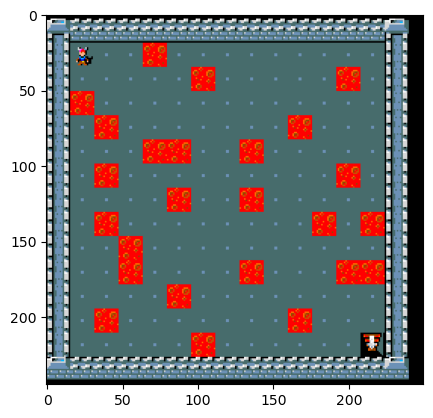

In [3]:
plt.imshow(obs_lv1['pixel'][45:290, 0:250])
plt.show()

In the following, we apply the `perform_search` function (which can be found in the 'Comparison.py' file) to each algorithm. We invoke the uninformed algorithms, namely Breadth-First Search and Uniform-Cost Search, as well as the informed algorithms, A* and Greedy Best-First Search. Finally, we present the respective results in a table and plot the corresponding graphs.

The `perform_search` function is designed to execute search in a given environment or level and works as follows:

* **Determine the Type of Search**:
    * If a `distance_function` is provided, indicating an informed search, the function instructs the `search_agent` to perform a search using the specified `search_algorithm` and the given distance heuristic (`distance_function`).
    * If no `distance_function` is provided, indicating an uninformed search, the `search_agent` conducts the search using the specified `search_algorithm`.

* **Record Search Results**:
    * The function calls `record_results` to store key information about the search results, including execution time, path length, and path cost.

* **Create and Highlight Graphs**:
    * Using `create_basic_graph`, a basic graph representing the problem and the current state is generated.
    * The `highlight_explored_nodes` function is then utilized to highlight nodes explored during the search within the basic graph, resulting in an explored graph.

* **Plot the Graphs**:
    * Depending on whether it's an informed or uninformed search, the function utilizes either `plot_graph_distances`(for informed search) or `plot_graph` (for uninformed search) to create and save a visual representation of the explored graph.
    * The generated plot is saved in a directory specific to the case and search algorithm.

> For a detailed examination of the plots, they can be reviewed individually.

In [4]:
grid_problem_lvl1 = generate_grid_problem(obs_lv1)
uninformed_agent_lvl1 = UninformedSearchAgent(grid_problem_lvl1)

perform_search(1, uninformed_agent_lvl1, breadth_first_search)
perform_search(1, uninformed_agent_lvl1, uniform_cost_search)

informed_agent_lvl1 = InformedSearchAgent(grid_problem_lvl1)
perform_search(1, informed_agent_lvl1, astar_search, euclidean_distance)
perform_search(1, informed_agent_lvl1, greedy_best_first_search, euclidean_distance)

df_lvl1 = generate_comparison_dataframe(1)
df_lvl1


,Execution Time,Path Length,Path Cost
Algorithm,,,
Breadth First Search (UA),0.003006,29,29
Uniform Cost Search (UA),0.006040,13,13
A* (IA),0.000700,13,13
Greedy Best First Search (IA),0.000480,13,13


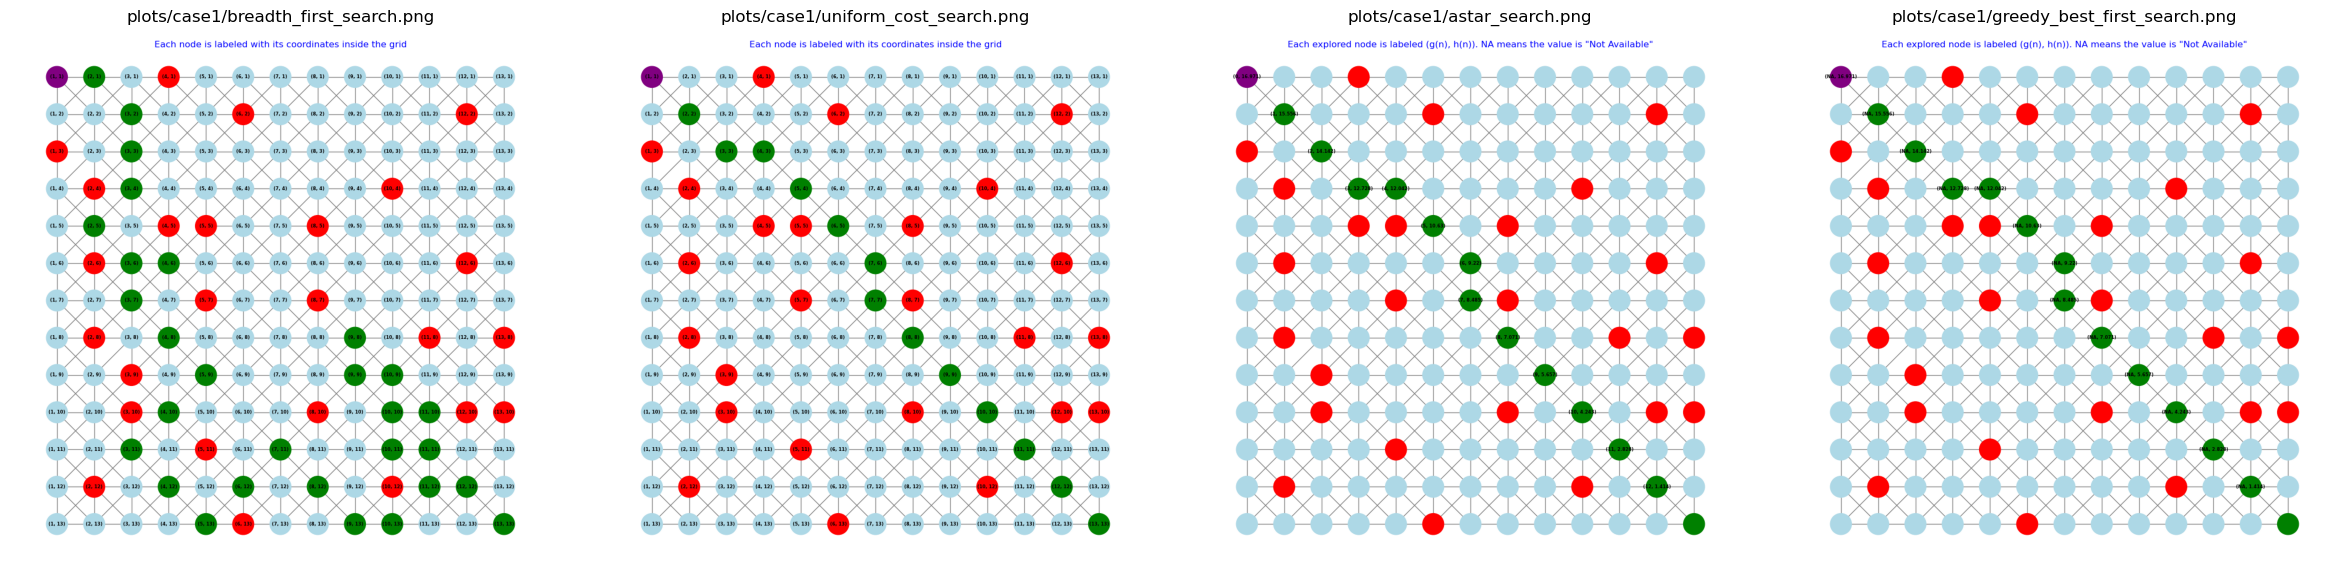

In [5]:
%matplotlib inline
plot_paths_level1 = ['plots/case1/breadth_first_search.png',
                    'plots/case1/uniform_cost_search.png',
                    'plots/case1/astar_search.png',
                    'plots/case1/greedy_best_first_search.png']

display_saved_plots(plot_paths_level1)

## LVL 2
In Level 2, we proceed similarly to Level 1, with the slight difference of increasing complexity by raising the number of lava pools.

In [6]:
# Creating the environment
env_lv2 = gym.make(
    "MiniHack-Navigation-Custom-v0",
    des_file=des_file_static_lv2,
    observation_keys =("chars", "colors", "specials", "pixel")
)

env_lv2.seed(42)
obs_lv2 = env_lv2.reset() 
env_lv2.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---------------                                                                 
|@..}...}.}...|                                                                 
|.....}.....}.|                                                                 
|}..}.}.......|                                                                 
|.}.......}..}|                                                                 
|...}}..}.....|                                                                 
|..}........}.|                                                                 
|..}.}...}}...|                                                                 
|.}..}..}}.}..|            

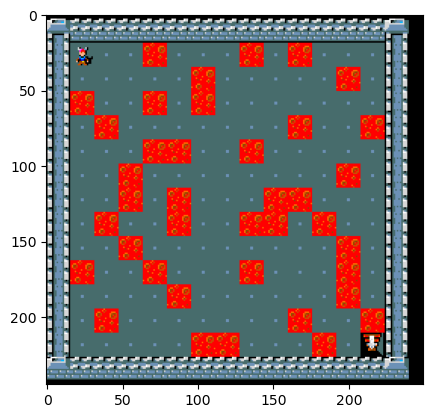

In [7]:
plt.imshow(obs_lv2['pixel'][45:290, 0:250])
plt.show()

In [8]:
grid_problem_lvl2 = generate_grid_problem(obs_lv2)
uninformed_agent_lvl2 = UninformedSearchAgent(grid_problem_lvl2)

perform_search(2, uninformed_agent_lvl2, breadth_first_search)
perform_search(2, uninformed_agent_lvl2, uniform_cost_search)

informed_agent_lvl2 = InformedSearchAgent(grid_problem_lvl2)
perform_search(2, informed_agent_lvl2, astar_search, euclidean_distance)
perform_search(2, informed_agent_lvl2, greedy_best_first_search, euclidean_distance)

df_lvl2 = generate_comparison_dataframe(2)
df_lvl2

,Execution Time,Path Length,Path Cost
Algorithm,,,
Breadth First Search (UA),0.004214,28,28
Uniform Cost Search (UA),0.007585,14,14
A* (IA),0.000849,14,14
Greedy Best First Search (IA),0.000401,14,14


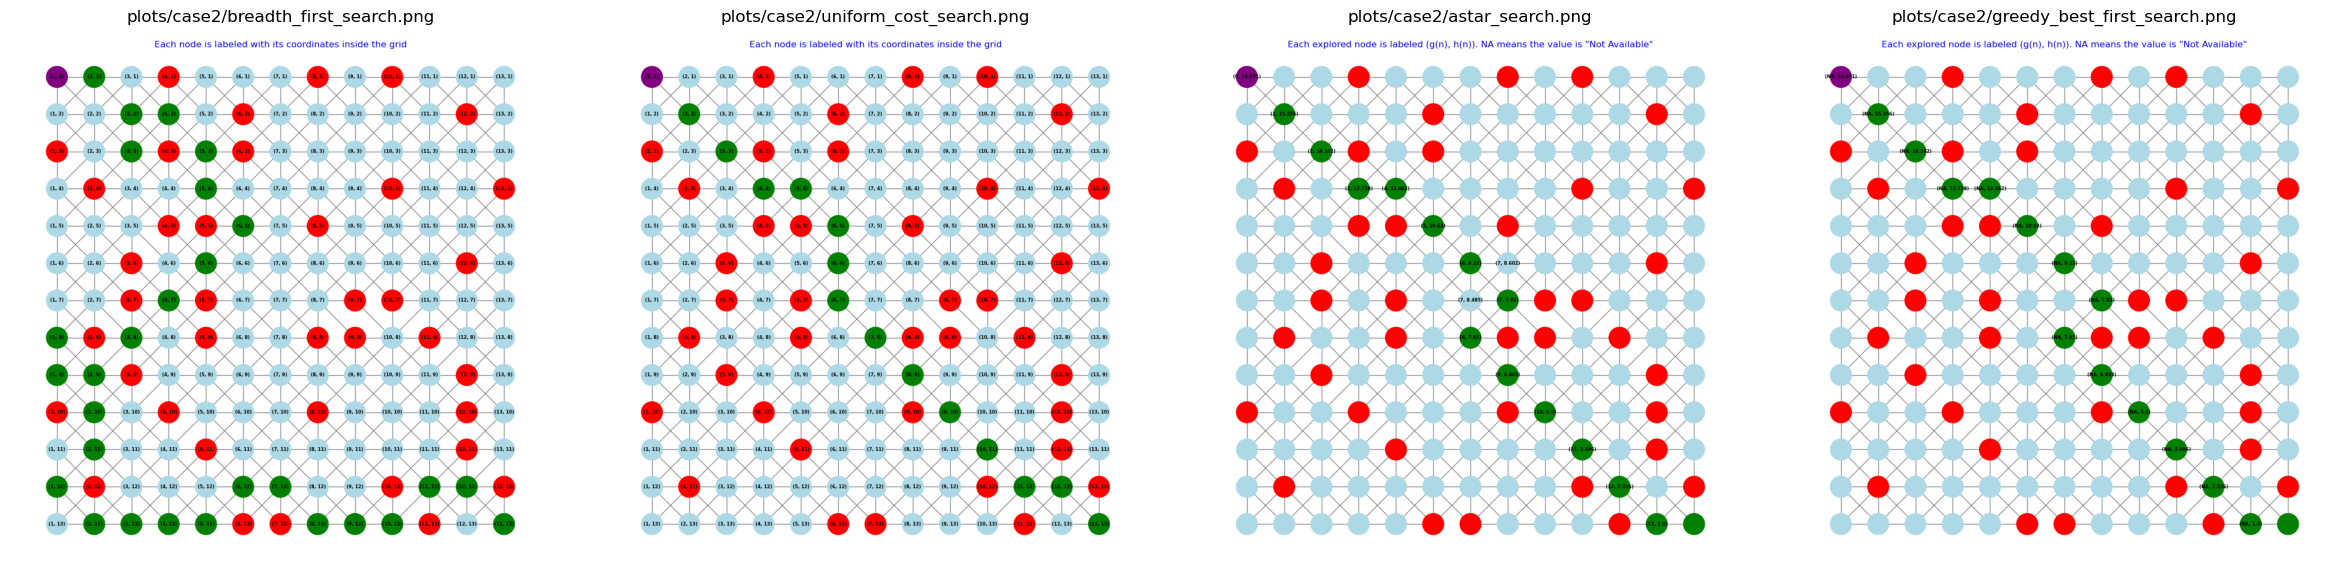

In [9]:
%matplotlib inline
plot_paths_level2 = ['plots/case2/breadth_first_search.png',
                    'plots/case2/uniform_cost_search.png',
                    'plots/case2/astar_search.png',
                    'plots/case2/greedy_best_first_search.png']

display_saved_plots(plot_paths_level2)

## LVL 3
In this level, we introduce Ice Pools in addition to Lava Pools, aiming to distinguish the costs associated with each cell and increasing the complexity of the environment.

In [10]:
# Creating the environment
env_lv3 = gym.make(
    "MiniHack-Navigation-Custom-v0",
    des_file=des_file_static_lv3,
    observation_keys =("chars", "colors", "specials", "pixel")
)

env_lv3.seed(42)
obs_lv3 = env_lv3.reset() #each reset generates a new environment instance
env_lv3.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---------------                                                                 
|@..}...}.}...|                                                                 
|.....}.....}.|                                                                 
|}..}.}.......|                                                                 
|.}.......}..}|                                                                 
|...}}..}.....|                                                                 
|..}........}.|                                                                 
|..}.}...}}...|                                                                 
|.}..}..}}.}..|            

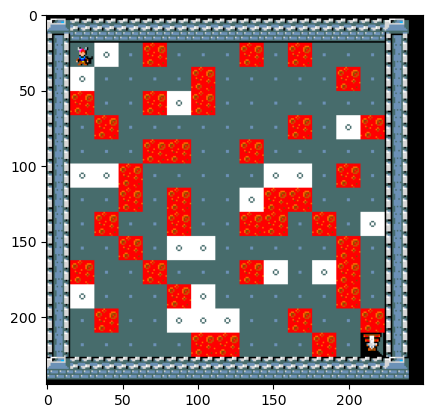

In [11]:
plt.imshow(obs_lv3['pixel'][45:290, 0:250])
plt.show()

In [12]:
grid_problem_lvl3 = generate_grid_problem(obs_lv3)
uninformed_agent_lvl3 = UninformedSearchAgent(grid_problem_lvl3)

perform_search(3, uninformed_agent_lvl3, breadth_first_search)
perform_search(3, uninformed_agent_lvl3, uniform_cost_search)

informed_agent_lvl3 = InformedSearchAgent(grid_problem_lvl3)
perform_search(3, informed_agent_lvl3, astar_search, euclidean_distance)
perform_search(3, informed_agent_lvl3, greedy_best_first_search, euclidean_distance)

df_lvl3 = generate_comparison_dataframe(3)
df_lvl3

,Execution Time,Path Length,Path Cost
Algorithm,,,
Breadth First Search (UA),0.005387,28,36
Uniform Cost Search (UA),0.005252,14,14
A* (IA),0.000715,14,14
Greedy Best First Search (IA),0.000386,14,18


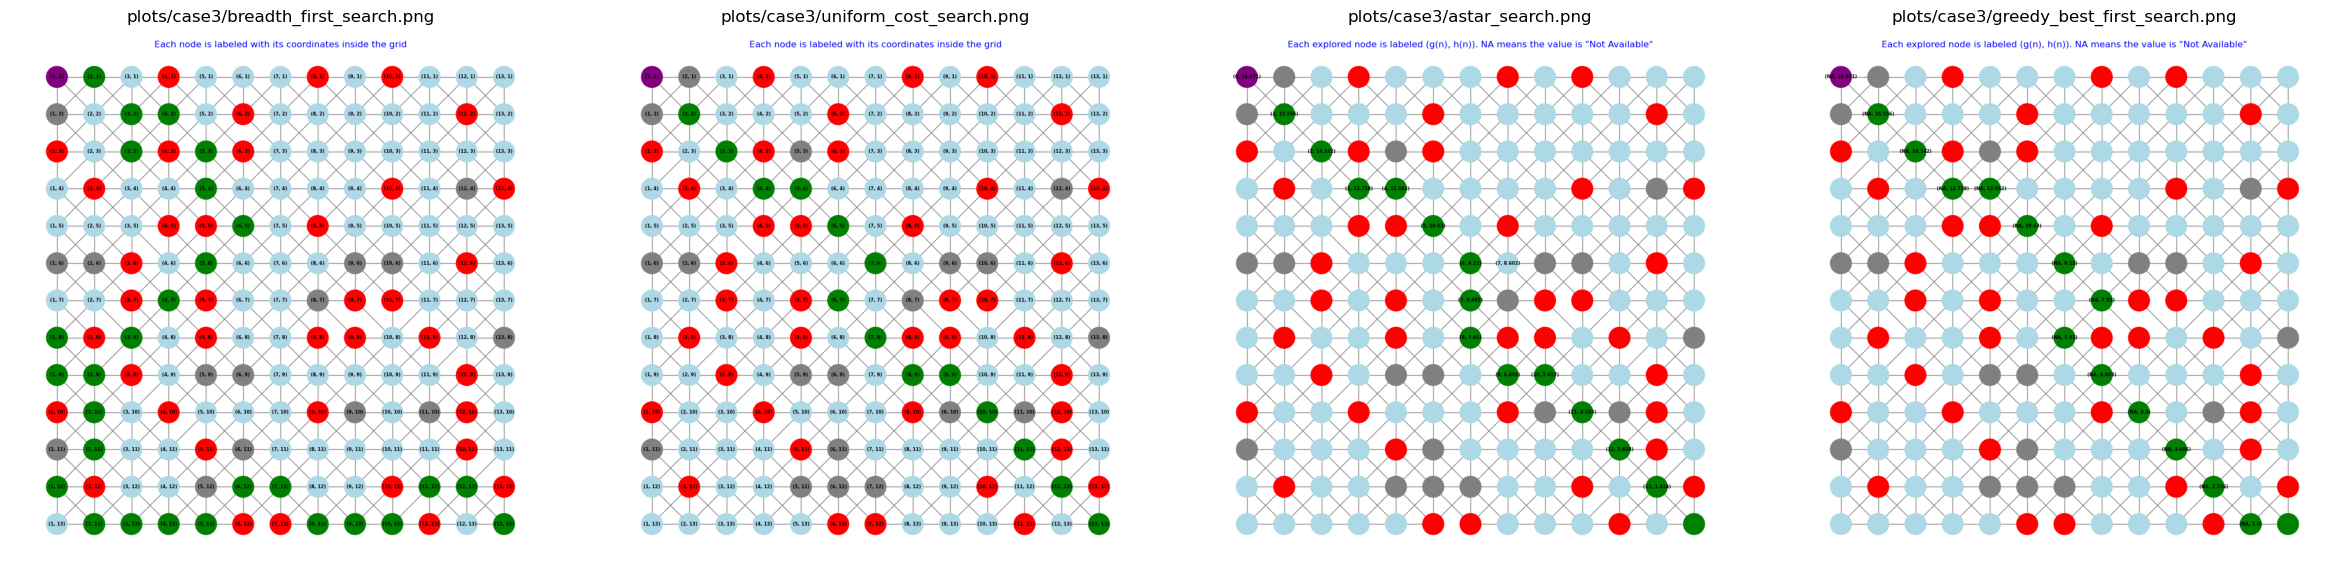

In [13]:
%matplotlib inline
plot_paths_level3 = ['plots/case3/breadth_first_search.png',
                    'plots/case3/uniform_cost_search.png',
                    'plots/case3/astar_search.png',
                    'plots/case3/greedy_best_first_search.png']

display_saved_plots(plot_paths_level3)

## Interim **Recap**: Insights Across the first Three Levels

Observing the results across the first three levels, our initial hypothesis stands confirmed — A* proves to be the most versatile algorithm for navigating the diverse challenges presented in each level. Here are the outcomes summarized:

In [14]:
print("Level 1:")
print(df_lvl1)
print("\nLevel 2:")
print(df_lvl2)
print("\nLevel 3:")
print(df_lvl3)

Level 1:
                               Execution Time  Path Length  Path Cost
Algorithm                                                            
Breadth First Search (UA)            0.003006           29         29
Uniform Cost Search (UA)             0.006040           13         13
A* (IA)                              0.000700           13         13
Greedy Best First Search (IA)        0.000480           13         13

Level 2:
                               Execution Time  Path Length  Path Cost
Algorithm                                                            
Breadth First Search (UA)            0.004214           28         28
Uniform Cost Search (UA)             0.007585           14         14
A* (IA)                              0.000849           14         14
Greedy Best First Search (IA)        0.000401           14         14

Level 3:
                               Execution Time  Path Length  Path Cost
Algorithm                                                    

Here's a closer look at the key observations:

*Level 1 and 2*:
* **Breadth First Search (UA)**: While it explores paths comprehensively, it incurs higher path length and cost.
* **Uniform Cost Search (UA)**: Similar to BFS, it demonstrates thorough exploration (high execution time) but with improved efficiency (shorter path).
* **A\* (IA)**: Balancing exploration and efficiency, A* performs optimally with the shortest path and minimal cost.
* **Greedy Best First Search (IA)**: Focuses on proximity to the goal and in this case finds the optimal solution.

*Level 3*:
* **Breadth First Search (UA)**: Exhibits increased path cost due to the introduction of ice pools, highlighting its susceptibility to challenging environments, particularly evident in non-uniform cost graphs.
* **Uniform Cost Search (UA)**: Remains efficient and optimal, handling the added complexities effectively, but has still a high execution time.
* **A\* (IA)**: Maintains optimal performance, showcasing its adaptability to varying path costs.
* **Greedy Best First Search (IA)**: Struggles with increased path cost, indicating limitations in adapting to altered environments.

## **Final Considerations - Part 1**
**A\*** emerges as the algorithm of choice, consistently delivering efficient and optimal paths across diverse challenges. Its ability to balance exploration and cost-effectiveness positions it as the preferred solution for our pathfinding endeavors. As we progress, further levels will refine these insights, contributing to a comprehensive understanding of algorithmic performance in dynamic environments.

# <u>Part 2 – **Tackling Pathfinding in Dynamic Environments with Online Search**<u>

In **Levels 4 and 5**, our project takes a new direction, aiming to heighten the complexity of the search process by introducing hostile monsters. At this point, departing from uninformed search methodologies becomes imperative. Instead of rewriting conventional algorithms, our focus shifted towards the development of: 

1. a **customized online algorithm**

and

2. a **new heuristic** designed to assert control over the evolving dynamic environment.

## The Monsters

To introduce monsters into the environment, we meticulously selected creatures with speeds equal to or less than the agent's speed, as documented on Nethack Wiki as **12**. In order to test our algorithm and adhere to the comparative approach, we chose two distinct monsters for evaluation. Providing some context, the "base" experience value corresponds to the monster's level, indicating the number of experience points the hero earns for defeating it. Consequently, despite the rat being faster, its lower experience level reduces the likelihood of it defeating the agent. Conversely, the Beetle, although slower, boasts a higher experience level, rendering it a more formidable adversary overall and increasing the difficulty for the agent.

**Sewer Rat**

| Difficulty | 1 |
| --- | --- |
| Attacks | Bite 1d3 |
| Level | 0 |
| Experience points | 1 |
| Speed | 12 |

**Giant Beetle**
| Difficulty | 6 |
| --- | --- |
| Attacks | Bite 3d6 |
| Level | 5 |
| Experience points | 56 |
| Speed | 6 |

## `onlineMode`

Conventional online search algorithms, while effective, face limitations in scenarios with entities exhibiting diverse behaviors. Our approach addresses this constraint by crafting an algorithm tailored for our specific necessities called `onlineMode`. This algorithm incorporates variables such as the type of monster, the chosen algorithm (A* or Greedy), and the distance function (Euclidean or Diagonal). In the experimental phase of our work, we explored both Euclidean and diagonal distances, considering their applicability to our grid-based map.

To elaborate on the key components:

* **Monster** (`m`): Represents the entity with diverse behaviors that the algorithm adapts to.
* **Algorithm (A or Greedy)** (`mode`): The algorithmic approach chosen to navigate through the environment.
* **Distance Function** (`he_type`): Determines the metric for measuring distance, with options for both Euclidean and Diagonal distances.

Reiterating the distinction between the two:

- **Euclidean distance** measures the straight-line or "as-the-crow-flies" distance between two points.
- **Diagonal distance** considers the maximum difference along the x or y axis, permitting movement in both horizontal and vertical directions without directional constraints.

The `onlineMode` function operates in an online search scenario, where it evaluates the best action to take at each step based on the current state and the information gathered so far. The considerations include whether the current state has been visited before, the available valid actions, and the evaluation of these actions based on their associated costs, considering either A* or Greedy algorithmic principles. Additionally, the function includes a mechanism to **handle dead ends**, ensuring efficient navigation in the dynamically changing environment.

This is particularly useful for Level 5, as the algorithm initiates a **backtracking process** to find an alternative path when a dead end is encountered.

## Our Heuristic

The primary innovation lies in the dynamic nature of the heuristic `heuristic_dyn`, enabling the configuration of parameters based on the unique attributes and behaviors of monsters in the environment to address distinct problems effectively. This customization empowers the algorithm to make informed decisions, strategically navigating challenges posed by various adversaries.

The heuristic takes into account the **distance between the agent and the monster**, calculating the cost of actions based on this distance. If the obstacle is sufficiently distant, the agent disregards its presence and aims directly for the goal. Otherwise, the algorithm assigns double weight to the distance to the goal compared to the distance from the monster. The reason behind this approach is to **prioritize the agent's efficient reaching of the goal with minimal steps**, rather than emphasizing escaping the monster. With this configuration, the agent tends to prioritize escape actions only in extremely hazardous situations.

## LVL 4 
In this level, the approach undergoes a slight modification as we now introduce a dynamic element. Following the customary creation of the environment, we invoke a function encompassing specific parameters for modifications. We alter the monster type, algorithm, and heuristic functions for distance within this `perform_online_search` function, located in the 'Comparison.py' file.

<u>What does the `perform_online_search` function do?</u>

* **Map Instantiation**:
    * The function starts by processing the observation data (`obs_lv`) to extract information about the game map, including characters and colors.
    * It then instantiates a `GridWorldProblem` by creating a grid map and providing the starting and goal positions based on the processed observation data.

* **Agent Instantiation**:
    * An `OnlineSearchAgent` is created, taking the `GridWorldProblem` as an input.

* **Map Visualization**:
    * The function visualizes the game map by plotting an image.

* **Agent Movement Loop**:
    * A loop is initiated where the agent continuously takes actions until it reaches a termination condition (presumably reaching the goal or losing the game).
    * Inside the loop:
        * The current agent position is printed.
        * Valid actions for the current agent position are determined.
        * The `online_search` method of the `OnlineSearchAgent` is called to obtain the next action and the resulting state.
        * The agent takes the next step in the environment (`env_lv`) using the selected action.
        * The game map is updated based on the new state of the environment.
        * The visualization is updated to reflect the new game state, and there is a pause of 1.5 seconds for display purposes.

* **Outcome Analysis**:
    * After the loop, it checks whether the agent reached the goal or not.
    * If the agent reached the goal, it prints a success message and provides information about the path length and cost.
    * If the agent did not reach the goal, it prints a "You loose" message.


**Next, we will proceed to test the respective sublevels and visually represent each. Please pay attention during the runtime!**

### LVL 4.1.: Rat - Online A* - Euclidean Distance

In [15]:
# Create the environment
env_lv4_1 = gym.make(
    "MiniHack-Navigation-Custom-v0",
    des_file=des_file_static_lv4_1,
    observation_keys =("chars", "colors", "specials", "pixel")
)

env_lv4_1.seed(42)
obs_lv4_1 = env_lv4_1.reset() 
env_lv4_1.render()

# Plots directly from minihack generator
plt.imshow(obs_lv4_1['pixel'][45:290, 0:250]) 

# Call the level
perform_online_search(obs_lv4_1, env_lv4_1, 'r', 'astar', 'euclidean')

Goal reached!
Path length: 17, Path cost: 17


### LVL 4.1.: Rat - Online A* - Diagonal Distance

In [16]:
env_lv4_1.seed(42)
obs_lv4_1 = env_lv4_1.reset() 

perform_online_search(obs_lv4_1, env_lv4_1, 'r', 'astar', 'diagonal')

Goal reached!
Path length: 25, Path cost: 25


### LVL 4.1.: Rat - Online Greedy Best-First Search - Euclidean Distance

In [17]:
env_lv4_1.seed(42)
obs_lv4_1 = env_lv4_1.reset() 

perform_online_search(obs_lv4_1, env_lv4_1, 'r', 'greedy', 'euclidean')

Goal reached!
Path length: 17, Path cost: 19


### LVL 4.1.: Rat - Online Greedy Best-First Search - Diagonal Distance

In [18]:
env_lv4_1.seed(42)
obs_lv4_1 = env_lv4_1.reset() 

perform_online_search(obs_lv4_1, env_lv4_1, 'r', 'greedy', 'diagonal')

Goal reached!
Path length: 24, Path cost: 26


### LVL 4.2.: Beetle - Online A* - Euclidean Distance

In [19]:
env_lv4_2 = gym.make(
    "MiniHack-Navigation-Custom-v0",
    des_file=des_file_static_lv4_2,
    observation_keys =("chars", "colors", "specials", "pixel")
)

env_lv4_2.seed(42)
obs_lv4_2 = env_lv4_2.reset() 
env_lv4_2.render()

perform_online_search(obs_lv4_2, env_lv4_2, 'a', 'astar', 'euclidean')

Goal reached!
Path length: 17, Path cost: 17


### LVL 4.2.: Beetle - Online A* - Diagonal Distance

In [20]:
env_lv4_2.seed(42)
obs_lv4_2 = env_lv4_2.reset() 

perform_online_search(obs_lv4_2, env_lv4_2, 'a', 'astar', 'diagonal')

Goal reached!
Path length: 20, Path cost: 22


### LVL 4.2.: Beetle - Online Greedy Best-First Search - Euclidean Distance

In [21]:
env_lv4_2.seed(42)
obs_lv4_2 = env_lv4_2.reset() 

perform_online_search(obs_lv4_2, env_lv4_2, 'a', 'greedy', 'euclidean')

Goal reached!
Path length: 17, Path cost: 19


### LVL 4.2.: Beetle - Online Greedy Best-First Search - Diagonal Distance

In [22]:
env_lv4_2.seed(42)
obs_lv4_2 = env_lv4_2.reset() 

perform_online_search(obs_lv4_2, env_lv4_2, 'a', 'greedy', 'diagonal')

Goal reached!
Path length: 17, Path cost: 19


### Results

We have obtained the following results:

|                                   | Rat                    |                            | Beetle                 |                            |
|-----------------------------------|------------------------|----------------------------|------------------------|----------------------------|
|                                   | Path Length            | Path Cost                  | Path Length            | Path Cost                  |
| Online A* - Euclidean distance    | 17                     | 17                         | 17                     | 17                         |
| Online A* - Diagonal distance     | 25                     | 25                         | 20                     | 22                         |
| Online Greedy Best-First Search - Euclidean distance | 17             | 19                         | 17                     | 19                         |
| Online Greedy Best-First Search - Diagonal distance  | 24             | 26                         | 17                     | 19                         |


From this, we can interpret that the Online A* algorithm performs best with the Euclidean distance, as it yields the optimal (minimal) results for both variables 'path length' and 'path cost'. We will use this outcome for Level 5 and proceed to incorporate dead-ends.

## LVL 5: Add **Dead Ends**
We will now introduce dead ends and assess the behavior of A* with the Euclidean distance for the two distinct monster types, namely the rat and beetle.

### LVL 5.1.: Rat - Online A* - Euclidean Distance - Dead Ends

In [23]:
env_lv5_1 = gym.make(
    "MiniHack-Navigation-Custom-v0",
    des_file=des_file_static_lv5_1,
    observation_keys =("chars", "colors", "specials", "pixel"),
)

env_lv5_1.seed(42)
obs_lv5_1 = env_lv5_1.reset() 
env_lv5_1.render()

# Plot directly from minihack generator
plt.imshow(obs_lv5_1['pixel'][45:290, 0:250]) 

perform_online_search(obs_lv5_1, env_lv5_1, 'r', 'astar', 'euclidean')

Goal reached!
Path length: 20, Path cost: 20


### LVL 5.2.: Beetle - Online A* - Euclidean Distance - Dead Ends

In [24]:
env_lv5_2 = gym.make(
    "MiniHack-Navigation-Custom-v0",
    des_file=des_file_static_lv5_2,
    observation_keys =("chars", "colors", "specials", "pixel"),
)

env_lv5_2.seed(42)
obs_lv5_2 = env_lv5_2.reset() 
env_lv5_2.render()

# Plots directly from minihack generator
plt.imshow(obs_lv5_2['pixel'][45:290, 0:250]) 

perform_online_search(obs_lv5_2, env_lv5_2, 'a', 'astar', 'euclidean')

Goal reached!
Path length: 29, Path cost: 29


### Result

|                                 | Without Dead Ends |                  | With Dead Ends         |                        |
|---------------------------------|-------------------|------------------|------------------------|------------------------|
| **Online A\* - Euclidean distance**  | Path Length       | Path Cost        | Path Length            | Path Cost              |
| Rat                             | 17                | 17               | 20                     | 20                     |
| Beetle                          | 17                | 17               | 29                     | 29                     |




The performance of A* is significantly influenced by the environment, particularly the introduction of dead ends. When dead ends are present, we observe that A* takes longer. Interestingly, the choice of monster type also plays a role. Previously, without dead ends, the respective test variables for each monster type were identical. Now, variations between the Rat and the Beetle have emerged, impacting the performance of A*.

## **Final Considerations - Part 2**

In our comprehensive analysis of the algorithm's performance across diverse environments, we have identified factors contributing to its success while recognizing areas for potential improvement.

Notably, the Diagonal distance, despite its theoretical advantages, consistently yielded less favorable outcomes in our specific context when compared to the Euclidean distance. This observation can be attributed to several factors:

* **Alignment with Environment Characteristics:** The distribution of obstacles and monsters within our environment plays a pivotal role. The Diagonal distance may not align optimally with the specific distribution of these elements, thereby influencing the algorithm's decision-making. Euclidean distance, as a straight-line measurement, is better positioned to capture the true spatial relationships within the environment.

* **Heuristic Function Quality:** The effectiveness of a heuristic function is contingent upon its ability to guide the algorithm efficiently. In our case, the heuristic function associated with Euclidean distance demonstrates effectiveness, aligning with the environment's characteristics and assisting the algorithm in making informed decisions.

While these observations underscore the advantages of the Euclidean distance heuristic in our specific case, the context-specific nature of these findings suggests that the choice between heuristics should be tailored to the intricacies of the environment and specific pathfinding requirements. We leave room for future developments by exploring different parameters in our heuristic, particularly focusing on the utilization of the diagonal distance, with the ultimate goal of perfecting our algorithm.

## **...So, what about Dante's dilemma?**

As our exploration concludes, we straightforwardly outline the outcomes of our algorithmic journey.


In the context of offline search, the maidens recommend A* for Dante, as it consistently outperforms other algorithms by reliably identifying the 'ShortBest' path to the exit.

Shifting to online search, the maidens not only offer guidance but also develop a customized algorithm. This specialized solution is crafted to meet Dante's real-time requirements. In this dynamic setting, their ingenuity is evident as they provide Dante with an advanced tool to navigate unexpected challenges.

<img src="pictures/picture2.png" width="800" />

### Teamwork

In conclusion, our project has been a remarkable journey exemplifying the enriching dynamics of working in a strongly international and multidisciplinary team. 

With two Erasmus students majoring in Business Informatics and two with a background in Digital Humanities, we truly embraced the challenge of stepping out of our comfort zones with great dedication. Working together was indeed a challenge, yet it proved to be a rewarding experience as we collaboratively navigated our project with authentic enthusiasm and a shared commitment to delivering our best. 

All in all, this journey not only expanded our perspectives at an academic level but also fostered a wonderful friendship among us. So, in the end, we sincerely hope that, beside all, our efforts effectively conveyed the message that sometimes challenges can take interesting turns in life, and that you never know what unexpected opportunities may arise from embracing diversity.

### Bibliography

- Russell, S., & Norvig, P. (2010). *Artificial Intelligence: A Modern Approach* (3rd ed.). Pearson.
- NetHack Wiki. "Monster." NetHack Wiki, https://nethackwiki.com/wiki/Monster.